# Comparing Experimental and Theoretical Data
### The Theory
The main goal for this project is to derive a function of time modeling the position of a rolling object along a function-defined ramp. The theory behind this derivation operates on the following assumptions:

- The object is not sliding along the ramp.
- The object maintains contact with the ramp through its entire course.
- Air resistance and energy loss due to vibration of the ramp is negligible.

The object's acceleration can be determined by considering the non-zero net torque due to gravity that will act on the ball at certain points along the ramp. For this experiment, the "object" is a steel ball bearing of mass $m =  16$ g and radius $r = 7.94$ mm.

### The Derivation

We know from rotational dynamics that:

$$\tag{1}\tau = I \alpha$$

Where $\tau$ is torque, $I$ is the object's moment of inertia and $\alpha$ is its angular acceleration. To describe the object's position along the ramp, translational, not rotational terms are required. For this we can use the kinematic constraint:

$$a = R\alpha \implies \alpha = \frac{a}{R}$$

And rearrange $(1)$ to realize that:

$$a = \frac{R\tau}{I}$$

Where $R$ is the radius of contact between the object and ramp. Notice that $a$ is a scalar. The second assumption comes in here by allowing multiplication of $a$ by the unit tangent vector to the ramp:

$$\mathbf{T}(x) = \frac{\dfrac{d}{dx}\left [\mathbf{r}(x)\right ]}{\left\vert\dfrac{d}{dx}\left [\mathbf{r}(x)\right ] \right\vert}$$

To get the object's acceleration vector. $\mathbf{r}(x)$ is a vector position function describing the ramp's shape. It is also necessary to realize that $I = I_{obj} + mR^{2}$ by parallel axis theorem because the object's center of mass is $R$ units distant from where it contacts the ramp--its pivot point. If the rolling object is a ball, $I_{obj} = (2/5)mr^{2}$. Thus far, it has been determined that:

$$\tag{2} \mathbf{a} = \frac{R\tau}{I_{obj} + mR^2} \cdot \mathbf{T}(x)$$

To obtain the torque magnitude $\tau$, the unit normal vector to the ramp, $\mathbf{N}(x)$, must be defined. This is because the moment arm of the torque due to gravity that produces acceleration will always be normal to the ramp.

$$\mathbf{N}(x) \equiv - T_{j}(x)\cdot\mathbf{i} + T_{i}(x)\cdot\mathbf{j}$$

The moment arm will have a length of $R$ and the force due to gravity is $m\mathbf{g} = -mg\mathbf{j}$. The torque vector and its magnitude can now be determined:

$$\boldsymbol{\tau} = R\mathbf{N}(x) \times -mg\cdot\mathbf{j} = \left\vert\begin{array}{cc} -RT_{j}(x) & RT_{i}(x) \\ 0 & -mg \end{array} \right\vert = mgR \cdot T_{j}(x) \cdot \mathbf{k}$$ 

$$\tau = mgR \cdot T_{j}(x)$$

Note that ${T}_{j}(x)$ is the $\mathbf{j}$ component of the ramp's unit tangent vector. Realizing that acceleration is the second derivative of position and substituting this result for the torque magnitude into $(2)$ yields the differential equation below. A negative is applied to the equation to ensure that positive accelerations correspond to the right of the ramps.

$$\frac{d^{2}\mathbf{s}}{dt^{2}} = \frac{-mgR^{2}\cdot T_{j}(x)}{I_{obj} + mR^{2}} \cdot \mathbf{T}(x)$$

## Import Libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Define Ramp Functions:
ramp #1 is defined by:

$$\mathbf{r}_{1}(x) = \left\{ \begin{array}{cc} x\mathbf{i} + \dfrac{1}{80}(x - 40)^{2}\mathbf{j} & 0 \leq x < 40 \\ \\ x\mathbf{i} & 40 \leq x \leq 150 \end{array} \right.$$

So the unit tangent vector is:

$$\mathbf{T}_{1}(x) = \left\{ \begin{array}{cc} \dfrac{\mathbf{i} + \dfrac{1}{40}(x - 40)\mathbf{j}} {\sqrt{\dfrac{1}{1600}x^{2} - \dfrac{1}{20}x + 2}} & 0 \leq x < 40 \\ \\ \mathbf{i} & 40 \leq x \leq 150 \end{array} \right.$$

In [3]:
def T_1(x):
    if (x >= 0) and (x < 40):
        denom = np.sqrt((1/1600)*x**2 - (1/20)*x + 2)
        i_comp = 1 / denom
        j_comp = ((1/40)*(x - 40)) / denom
    else:
        i_comp = 1
        j_comp = 0
    return [i_comp, j_comp]

And ramp #2 is defined as:

$$\mathbf{r}_{2}(x) = \left\{ \begin{array}{cc} x\mathbf{i} + \dfrac{1}{80}(x - 40)^{2}\mathbf{j} & 0 \leq x < 40 \\ \\ x\mathbf{i} & 40 \leq x < 50 \\ \\ x\mathbf{i} + \left [ 5 cos \left ( \dfrac{2\pi}{80} x - \dfrac{5}{4} \pi \right ) - 5 \right ] \mathbf{j} & 50 \leq x < 130 \\ \\ x\mathbf{i} & 130 \leq x \leq 150\end{array} \right.$$

So the unit tangent vector is:

$$\mathbf{T}_{2}(x) = \left\{ \begin{array}{cc} \dfrac{\mathbf{i} + \dfrac{1}{40}(x - 40)\mathbf{j}} {\sqrt{\dfrac{1}{1600}x^{2} - \dfrac{1}{20}x + 2}} & 0 \leq x < 40 \\ \\ \mathbf{i} & 40 \leq x < 50 \\ \\ \dfrac{\mathbf{i} - \dfrac{\pi}{8} sin \left ( \dfrac{\pi}{40} x - \dfrac{5}{4} \pi \right ) \mathbf{j}} {\sqrt{1 + \dfrac{\pi^{2}}{64} sin^{2} \left (\dfrac{\pi}{40} x - \dfrac{5}{4} \pi \right ) }} & 50 \leq x < 130 \\ \\ \mathbf{i} & 130 \leq x \leq 150\end{array} \right.$$

In [4]:
def T_2(x):
    if (x >= 0) and (x < 40):
        denom = np.sqrt((1/1600)*x**2 - (1/20)*x + 2)
        i_comp = 1 / denom
        j_comp = ((1/40)*(x - 40)) / denom
    elif (x >= 40) and (x < 50):
        i_comp = 1
        j_comp = 0
    elif (x >= 50) and (x < 130):
        denom = np.sqrt(1 + ((np.pi**2)/64) * np.sin((np.pi/40)*x - (5/4)*np.pi)**2)
        i_comp = 1 / denom
        j_comp = (-(np.pi/8) * np.sin((np.pi/40)*x - (5/4)*np.pi)) / denom
    else:
        i_comp = 1
        j_comp = 0
    return [i_comp, j_comp]

## Define Constants:

In [5]:
m = 16.4 # g
g = 9810 # mm/s^2
R = 7.55 # mm
r = 7.94 # mm
I_obj = (2/5)*m*r**2 # g*mm^2
I = I_obj + m*R**2 # g*mm^2

## Define the ODE:
In scalar form concerning the object's horizontal position, the ODE derived at the beginning of this document is the following:

$$\frac{d^{2}x}{dt^{2}} = \frac{-mgR^{2}\cdot T_{j}(x)}{I_{obj} + mR^{2}} \cdot T_{i}(x)$$

In [6]:
def acceleration(T, x):
    num = -m*g*R**2*T(x)[1]
    denom = I
    return (num/denom)*T(x)[0]

## Load the Processed Data:
At this point, the processed experimental data should be loaded to determine the final time for the trials, ball's initial position, and the error with the experimental data.

In [7]:
ramp1_exp_t_x_ci = np.transpose(np.load('processed data/ramp1_time_vs_avg_position.npy'))
ramp2_exp_t_x_ci = np.transpose(np.load('processed data/ramp2_time_vs_avg_position.npy'))

# The x and t data is in the first two rows:
ramp1_exp_t_x = ramp1_exp_t_x_ci[0:2, :]
ramp2_exp_t_x = ramp2_exp_t_x_ci[0:2, :]

# The confidence interval (95%) is in the third row:
ramp1_exp_ci = ramp1_exp_t_x_ci[2, :]
ramp2_exp_ci = ramp2_exp_t_x_ci[2, :]

In [8]:
# The first column is time data. This information is important as initial conditions for the approximations to come:
ramp1_run_time = ramp1_exp_t_x[0, -1]
ramp2_run_time = ramp2_exp_t_x[0, -1]
ramp1_x0 = ramp1_exp_t_x[1, 0]
ramp2_x0 = ramp2_exp_t_x[1, 0]

## Runge-Kutta 4 Approximation:

$$\frac{d^{2}x}{dt^{2}} = \frac{mgR^{2}\cdot T_{j}(x)}{I_{obj} + mR^{2}} \cdot T_{i}(x) \implies \frac{dv}{dt} = \frac{mgR^{2}\cdot T_{j}(x)}{I_{obj} + mR^{2}} \cdot T_{i}(x) \quad \mathrm{and} \quad \frac{dx}{dt} = v$$

So two Runge-Kutta 4 approximations must be performed simultaneously such that:

$$\left . \begin{array}{c} k_{1, v} = \dfrac{dv}{dt} \left ( x_{i} \right ) \\
                   k_{2, v} = \dfrac{dv}{dt} \left ( x_{i} + \dfrac{h}{2} \cdot k_{1, x} \right )\\
                   k_{3, v} = \dfrac{dv}{dt} \left ( x_{i} + \dfrac{h}{2} \cdot k_{2, x} \right )\\
                   k_{4, v} = \dfrac{dv}{dt} \left ( x_{i} + h \cdot k_{3, x} \right ) \end{array}    \right \} v_{i + 1} = \dfrac{h}{6} \left ( k_{1, v} + 2 k_{2, v} + 2 k_{3, v} + k_{4, v} \right )$$
                           
$$\left . \begin{array}{c} k_{1, x} = v_{i} \\
                   k_{2, x} = v_{i} + \dfrac{h}{2} \cdot k_{1, v} \\
                   k_{3, x} = v_{i} + \dfrac{h}{2} \cdot k_{2, v} \\
                   k_{4, x} = v_{i} + h \cdot k_{3, v} \end{array}    \right \} x_{i + 1} = \dfrac{h}{6} \left ( k_{1, x} + 2 k_{2, x} + 2 k_{3, x} + k_{4, x} \right )$$
                   
Notice that after solving for $k_{1, v}$ or $k_{1, x}$, the algorithm must solve for $k_{n, v}$ and $k_{n, x}$ before $k_{ \left ( n + 1 \right ), v}$ and $k_{ \left ( n + 1 \right ), x }$.

In [9]:
def runge_kutta_4(ode, T, x0, h, run_time):
    
    # Define the times over which the approximation is happening:
    t = np.arange(0, run_time, h)
    
    # How many cycles of the algorithm? One for every time:
    cycles = len(t)
    
    # Instantiate empty arrays to fill as the cycles progress:
    v = np.empty(cycles)
    x = np.empty(cycles)
    
    # Set initial conditions:
    v[0] = 0 # mm/s
    x[0] = x0 # mm
    
    # Begin the loop:
    for i in range(cycles - 1):
        
        # Compute the intermediate terms for the two Runge-Kutta 4 approximations as detailed in the previous cell:
        k_1_v = ode(T, x[i])
        k_1_x = v[i]
        k_2_v = ode(T, x[i] + (h/2)*k_1_x)
        k_2_x = v[i] + (h/2)*k_1_v
        k_3_v = ode(T, x[i] + (h/2)*k_2_x)
        k_3_x = v[i] + (h/2)*k_2_v
        k_4_v = ode(T, x[i] + h*k_3_x)
        k_4_x = v[i] + h*k_3_v
        
        # Use the intermediate terms to compute the ball's approximate position and velocity after the next time step:
        x[i + 1] = x[i] + (h/6)*(k_1_x + 2*k_2_x + 2*k_3_x + k_4_x)
        v[i + 1] = v[i] + (h/6)*(k_1_v + 2*k_2_v + 2*k_3_v + k_4_v)
    
    return [t, x]

This algorithm is applied to each ramp with a step size of $h = 0.001$ s:

In [10]:
ramp1_theo_t_x = runge_kutta_4(acceleration, T_1, x0=ramp1_x0, h=0.001, run_time=ramp1_run_time)
ramp2_theo_t_x = runge_kutta_4(acceleration, T_2, x0=ramp2_x0, h=0.001, run_time=ramp2_run_time)

## Plot the Experimental Data with Theoretical Data:

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


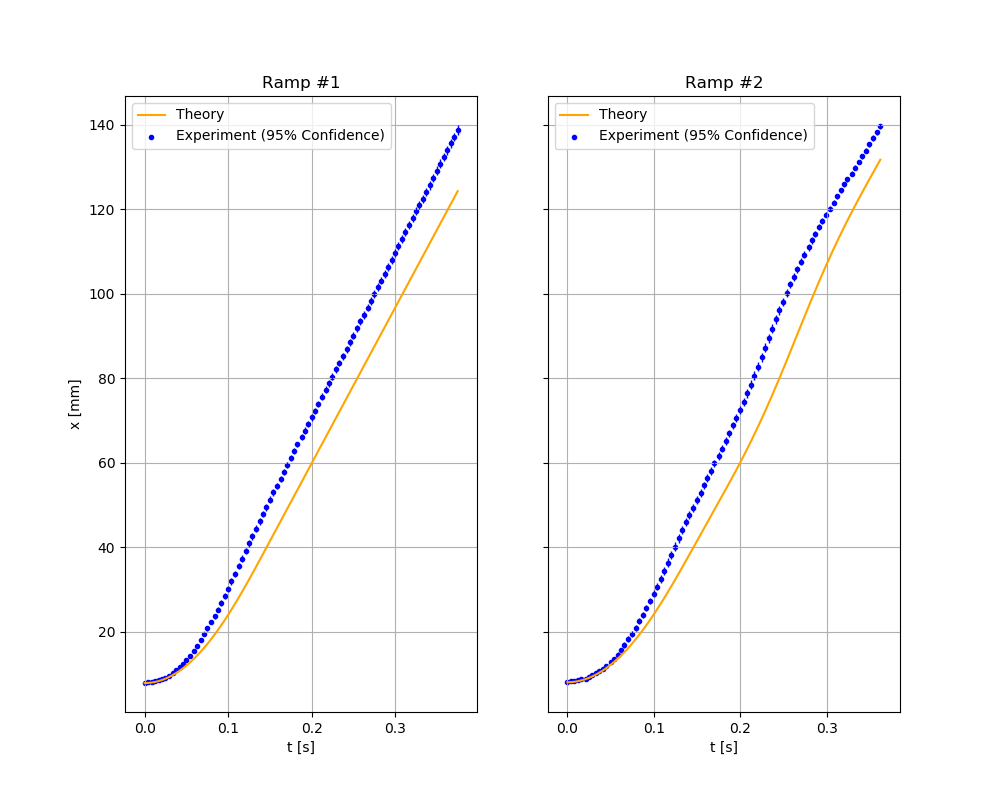

In [12]:
fig, [ramp1_axes, ramp2_axes] = plt.subplots(nrows=1, ncols=2, figsize=[10, 8], sharey=True)

# Plot the data for the first ramp:
ramp1_axes.set_title('Ramp #1')
ramp1_axes.set_xlabel('t [s]')
ramp1_axes.set_ylabel('x [mm]')
ramp1_axes.grid(True)
ramp1_axes.scatter(ramp1_exp_t_x[0], ramp1_exp_t_x[1], color='blue', marker='.', label='Experiment (95% Confidence)')
ramp1_axes.errorbar(ramp1_exp_t_x[0], ramp1_exp_t_x[1], yerr=ramp1_exp_ci, ecolor='blue', fmt='none', elinewidth=1)
ramp1_axes.plot(ramp1_theo_t_x[0], ramp1_theo_t_x[1], color='orange', linestyle='-', label='Theory')
ramp1_axes.legend()

# Plot the data for the second ramp:
ramp2_axes.set_title('Ramp #2')
ramp2_axes.set_xlabel('t [s]')
ramp2_axes.grid(True)
ramp2_axes.scatter(ramp2_exp_t_x[0], ramp2_exp_t_x[1], color='blue', marker='.', label='Experiment (95% Confidence)')
ramp2_axes.errorbar(ramp2_exp_t_x[0], ramp2_exp_t_x[1], yerr=ramp2_exp_ci, ecolor='blue', fmt='none', elinewidth=1)
ramp2_axes.plot(ramp2_theo_t_x[0], ramp2_theo_t_x[1], color='orange', linestyle='-', label='Theory')
ramp2_axes.legend()

# Save this figure:
plt.savefig('results.pdf', bbox_inches='tight')

## Conclusion:
The model seems to accurately predict where accelerations occur, which is indicated by the similar occurrence of straight and curved slopes on the experimental and theoretical data plots. However, the divergence of predictions from experimental results indicates that it underestimates the magnitude of acceleration occurring.

Recall that this model assumes the ball rolls without slipping. I think the discrepancy between observations and theory may be caused by the ball slipping along the ramp. A greater resultant force down the direction of the ramp caused by a smaller kinetic (as opposed to static) friction force would explain the higher-than-predicted acceleration near the beginning of the ramp. Measuring the coefficient of static friction between the ball and ramps would involve finding the maximum angle before the ball slips. This angle could then be compared to the ramps to predict where (if anywhere) the ball is slipping. Alternatively, an experiment with a non-reflective, appropriately-marked object could reveal where slipping is occuring by comparing its linear and angular velocities.